In [1]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import numpy as np
import json
rc('text',
   usetex=True)
sns.set_style('ticks')
font = {
    'font.family':'Times New Roman',
    'font.weight': 200,
    'font.size': 10,
}
sns.set_style(font)
flatui = ['#002A5E', '#FD151B', '#8EBA42', '#348ABD', '#988ED5', '#BDB76B', '#8EBA42', '#FFB5B8']
sns.set_palette(flatui)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.bf': 'Times New Roman:bold',
}
sns.set_context("paper", font_scale=2,  rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
bar_width = .25
throughputs_file = '../combined_throughputs_with_p100.json'

In [3]:
with open(throughputs_file, 'r') as f:
    throughputs = json.load(f)

In [4]:
k80 = []
for i in range(len(throughputs['k80'])):
    k80.append(1.0)

In [5]:
p100 = []
for model in sorted(throughputs['p100'].keys()):
    p100.append(throughputs['p100'][model]['null'] / throughputs['k80'][model]['null'])

In [6]:
v100 = []
for model in sorted(throughputs['v100'].keys()):
    v100.append(throughputs['v100'][model]['null'] / throughputs['k80'][model]['null'])

In [7]:
for model, p, v in zip(sorted(throughputs['k80'].keys()), p100, v100):
    print('%s: Speedup on P100: %.2fx, Speedup on V100: %.2fx' % (model, p, v))

A3C: Speedup on P100: 1.45x, Speedup on V100: 2.31x
CycleGAN: Speedup on P100: 4.72x, Speedup on V100: 7.17x
LM: Speedup on P100: 45.49x, Speedup on V100: 61.05x
Recommendation: Speedup on P100: 1.17x, Speedup on V100: 1.80x
ResNet-18: Speedup on P100: 4.83x, Speedup on V100: 7.92x
ResNet-50: Speedup on P100: 4.74x, Speedup on V100: 2.37x
Transformer: Speedup on P100: 2.52x, Speedup on V100: 5.00x


In [8]:
r1 = np.arange(len(k80))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

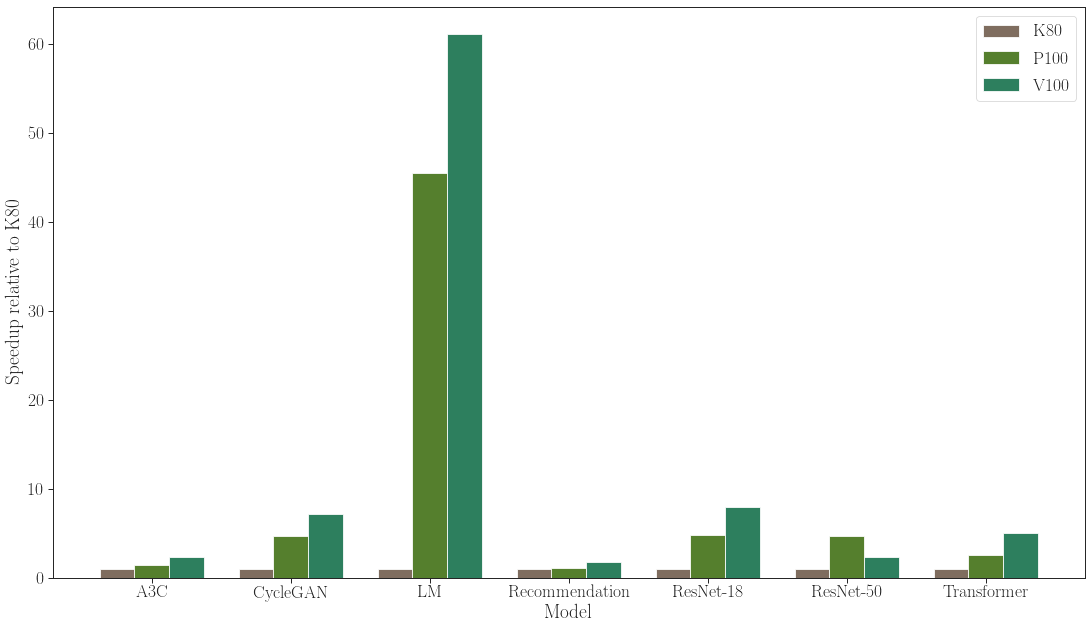

In [16]:
plt.bar(r1, k80, color='#7f6d5f', width=bar_width, edgecolor='white', label='K80')
plt.bar(r2, p100, color='#557f2d', width=bar_width, edgecolor='white', label='P100')
plt.bar(r3, v100, color='#2d7f5e', width=bar_width, edgecolor='white', label='V100')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Speedup relative to K80')
plt.xticks([r + bar_width for r in range(len(k80))], sorted(throughputs['k80'].keys()))
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()